<a href="https://colab.research.google.com/github/Pharseus/Machine-Learning/blob/main/04_Perceptron_w5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **04. Perceptron**
Please copy or download this python notebook to your drive for assignment submission

# **TO DO** Import numpy and matplotlib

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# **Create Perceptron from Scratch and Train data**
In this section we will create perceptron from scratch. These are the steps for this section of this practicum.

## ***TO DO*** Create dataset for truth table OR using numpy array for X as data input and y as data target using numpy array

This is the truth table of OR

x1 | x2 | y
--- | --- | ---
0 | 0 | -1
0 | 1 | 1
1 | 0 | 1
1 | 1 | 1

In [ ]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y = np.array([
    [-1],
    [1],
    [1],
    [1]
    ])
print(f'{X} \n {y}')

## ***TO DO*** Create a function to train perceptron
This function will takes in
1. Data input `X`
2. Data target `y`
3. Initial perceptron weight `w` where,
  
  1. `w[0]` is bias
  2. `w[1]` is weight for x1
  3. `w[2]` is weight for x2

4. Number of iteration `i`

This function will calculate the output, the error, and update the weight `w` until the number of iteration. Then, this function should return the trained `w`


In [ ]:
def train_perceptron(X, y, w, i):
  weight = w[1:]
  bias = w[0]

  # Train Perceptron
  return np.hstack([bias, weight])

## ***TO DO*** Set the iteration number and use train_perceptron function and plot the results

In [ ]:
# Set the Hyperparameter
w = np.random.randn(3) # Initialize random weight
iteration = 4 # Set iteration number
print('Initial w : ',w)

# Train the perceptron network
w = train_perceptron(X, y, w, iteration)
print('Trained w : ',w)

# Plot the perceptron result
# Plot the classification line
plt.plot(np.linspace(-10,10,5), -(w[1]/w[2])*np.linspace(-10,10,5)-w[0]/w[2])

# Plot the data
plt.plot(X[(y == 1).flatten(), 0], X[(y == 1).flatten(), 1], 'o', color='blue')
plt.xlabel('x1')

plt.plot(X[(y == -1).flatten(), 0], X[(y == -1).flatten(), 1], 'o', color='red')
plt.ylabel('x2')

plt.ylim(-0.2, 1.2)
plt.xlim(-0.2, 1.2)
plt.show()

## ***TO DO*** Create a function to train perceptron with l2 penalty
This function will takes in
1. Data input `X`
2. Data target `y`
3. Initial perceptron weight `w` where,
  
  1. `w[0]` is bias
  2. `w[1]` is weight for x1
  3. `w[2]` is weight for x2

4. Number of iteration `i`
5. Hyperparameter `alpha` to calculate $\alpha \Vert w \Vert_2$ (nb. $\Vert w \Vert_2$ can be calculated using `np.linalg.norm(w, 2)` )

This function will calculate the output, the error, and update the weight `w` until the number of iteration. Then, this function should return the trained `w`


In [ ]:
def train_perceptron_l2(X, y, w, i, alpha):
  weight = w[1:]
  bias = w[0]

  # Train Perceptron

  return np.hstack([bias, weight])

## ***TO DO*** Set iteration and alpha then use train_perceptron_l2 function and plot the results

Notes : be careful with alpha hyperparameters, if you do not see the line in the plot or the data is not separated correctly then your alpha is incorrect

In [ ]:
# Set the Hyperparameter
w = np.random.randn(3) # Initialize random weight
iteration = 5 # Set iteration number
alpha = 0.05 # Set alpha parameters
print('Initial w : ',w)

# Train perceptron network
w = train_perceptron_l2(X, y, w, iteration, alpha)
print('Trained w : ',w)

# Plot the perceptron results
# Plot the classification line
plt.plot(np.linspace(-10,10,5), -(w[1]/w[2])*np.linspace(-10,10,5)-w[0]/w[2])

# Plot the data
plt.plot(X[(y == 1).flatten(), 0], X[(y == 1).flatten(), 1], 'o', color='blue')
plt.xlabel('x1')

plt.plot(X[(y == -1).flatten(), 0], X[(y == -1).flatten(), 1], 'o', color='red')
plt.ylabel('x2')

plt.ylim(-0.2, 1.2)
plt.xlim(-0.2, 1.2)
plt.show()

# **Using perceptron from sklearn**

## **MNIST dataset**
MNIST dataset is a dataset that contains images of handwritten digits. The dataset is available in google colab file explorer under `sample_data/mnist_train_small.csv` and `sample_data/mnist_test.csv`

MNIST example:
<div>
<img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" width="500"/>
</div>

In google colab, the datasets are saved as a csv with every row containing a flatten matrix from each image


### Load `mnist_train_small.csv` using `np.loadtxt`
First we will load the dataset

In [ ]:
train_mnist = np.loadtxt('sample_data/mnist_train_small.csv', delimiter=',')
test_mnist = np.loadtxt('sample_data/mnist_test.csv', delimiter=',')

Each row contains 785 columns, the first column is the image label/target

The rest of the columns are intensity (please refer to your Image Processing courses)

In [ ]:
len(train_mnist[0])

In [ ]:
# Input
train_mnist[0][1:]

In [ ]:
# Target
train_mnist[0][0:]

### ***TO DO*** Split `train_mnist` and `test_mnist` into data input `X` and data target `y`

In [ ]:
X_train = train_mnist[:,1:]
y_train = train_mnist[:,0]
X_test = test_mnist[:,1:]
y_test = test_mnist[:,0]

Display the mnist images

In [ ]:
# Display sample image, Note: the data is 784 and we reshape it to be 28x28 pixels image
plt.imshow(X_train[0].reshape(28,28), cmap="gray")
plt.title(int(y_train[0]))
plt.axis('off')
plt.show()

In [ ]:
# Display sample image
plt.imshow(X_train[5].reshape(28,28), cmap="gray")
plt.title(int(y_train[5]))
plt.axis('off')
plt.show()

## Train using `sklearn.linear_model.Perceptron`
Then we will train mnist data using sklearn libary https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

### ***TO DO*** Import and initialize Perceptron
Perceptron architecture for MNIST. The perceptron will have 784 neuron for input layer and will have 10 neuron for output layer. Every neuron in the output layer will represents which number is the input.

For example, if the input is image of number 5, the output should be 1 for output neuron 5 and 0 for the rest

```output = [0,0,0,0,0,1,0,0,0,0]```

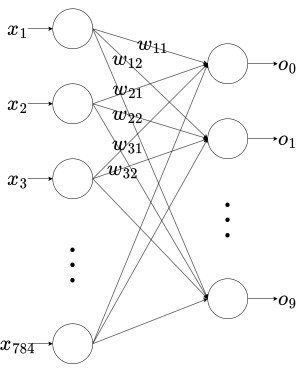

### ***TO DO*** Train Perceptron using mnist train data
Try different hyperparameter such that you get the best performance of your model. Reference : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

<div>
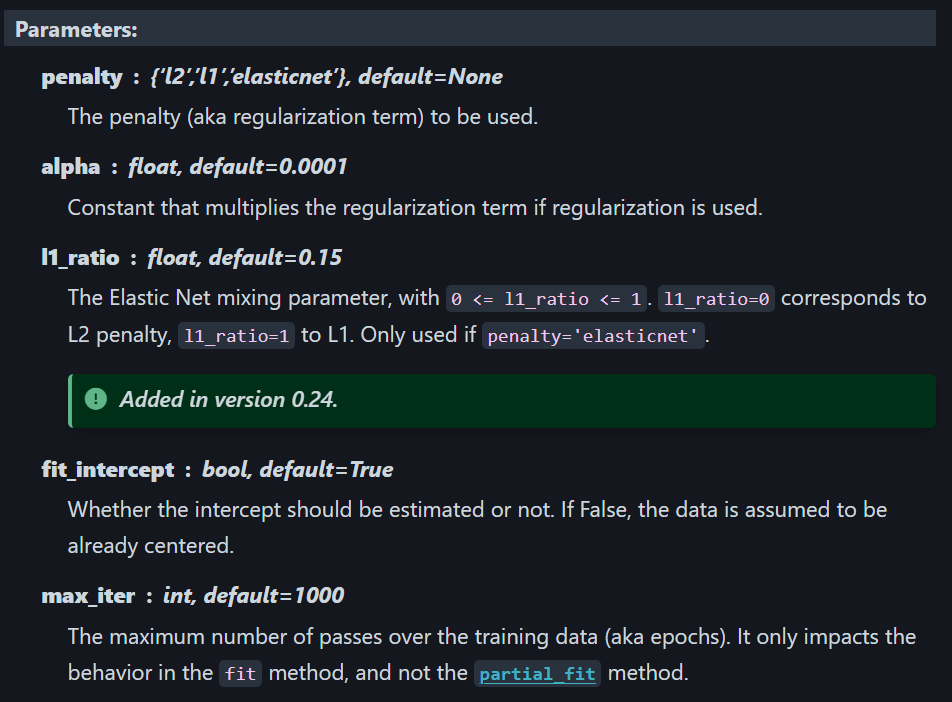
</div>

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

clf.score(X_train, y_train)

y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

#precision = ketepatan predeksi, 0.90 -> 90% Dari semua prediksi "0", 90% benar-benar 0. precision rendah berarti false positive('model sering salah klaim')
#recall(sensitify) = dari semua angka 0 di sample, 98% berhasil ditebak benar
#f1-score = Rata-rata harmonis dari precision & recall-> seimbang antara keduanya.
#support = jumlah sample gambar yang ditest untuk kelas x

### ***TO DO*** Test Perceptron using mnist test data and show the classification report

reference https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
y_true = y_train
#y_pred udah ada diatas
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(y_true, y_pred, target_names=target_names))